# Regresión Logistica
##### Nombre: Soria Colque Franz Ronald
 
github:
Clasificacion  de satisfaccion del servicion que ofrece una aerolinea

Satisfecho 0
insatisfecho 1


In [172]:
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
# Librerias para graficar
from matplotlib import pyplot
# Modulo de optimización de scipy
from scipy import optimize
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [173]:
data = pd.read_csv('./dataset/data03_entrenamiento_satisfacion_servisio_aerolinea.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [174]:
def col_numericas(ruta):
    data =pd.read_csv(ruta)
    columnas_numericas = data.select_dtypes(include=['number'])
    posiciones_columnas_numericas = np.array([data.columns.get_loc(col) for col in columnas_numericas.columns])
    col_num = posiciones_columnas_numericas.tolist()
    return col_num


In [175]:

def csvAdapter(dataset,modificarColumnas,eliminarColumnas):
    data =pd.read_csv(dataset,encoding='latin-1')
    columna = data.columns
    data = data.dropna()
    for index in modificarColumnas:
        name = columna[index]
        value = list(data[name].unique())
        data[name] = data[name].map(dict(zip(value,[i for i in range(len(value))])))
    #print(data.head())
    data = data.drop([columna[index]for index in eliminarColumnas], axis=1)
    return data

In [176]:
rutadataset = './dataset/data03_entrenamiento_satisfacion_servisio_aerolinea.csv'
print(col_numericas(rutadataset))

[0, 1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [177]:
columnaCategoricas = [i for i in range(0, 25) if not i in [4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]  # poner columnas que no son categoricas
print(columnaCategoricas)
eliminarColumnas=[0,1,11,22,23]#columna a eliminar
data = csvAdapter(rutadataset, columnaCategoricas,eliminarColumnas)

[0, 1, 2, 3, 5, 6, 11, 22, 23, 24]


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             103594 non-null  int64
 1   Customer Type                      103594 non-null  int64
 2   Age                                103594 non-null  int64
 3   Type of Travel                     103594 non-null  int64
 4   Class                              103594 non-null  int64
 5   Flight Distance                    103594 non-null  int64
 6   Inflight wifi service              103594 non-null  int64
 7   Departure/Arrival time convenient  103594 non-null  int64
 8   Ease of Online booking             103594 non-null  int64
 9   Food and drink                     103594 non-null  int64
 10  Online boarding                    103594 non-null  int64
 11  Seat comfort                       103594 non-null  int64
 12  Infligh

In [179]:
#comprobara que solo sea binario 
value = list(data["satisfaction"].unique())
print(len(value))


2


In [180]:
data=data.to_numpy()

In [181]:
X,y=data[:,:19],data[:,19]
print(X.shape,X[0])
print(y)

(103594, 19) [  0   0  13   0   0 460   3   4   3   5   3   5   5   4   3   4   4   5
   5]
[0 0 1 ... 0 0 0]


### 1.1 Visualizar los datos


In [182]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y 
    # o para los negativos.
    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 2], X[pos, 3], X[pos, 4], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 2], X[neg, 3], X[pos, 4],'ko', mfc='y', ms=8, mec='k', mew=1)
    

Se llama a la función implementada para mostrar los datos cargados:

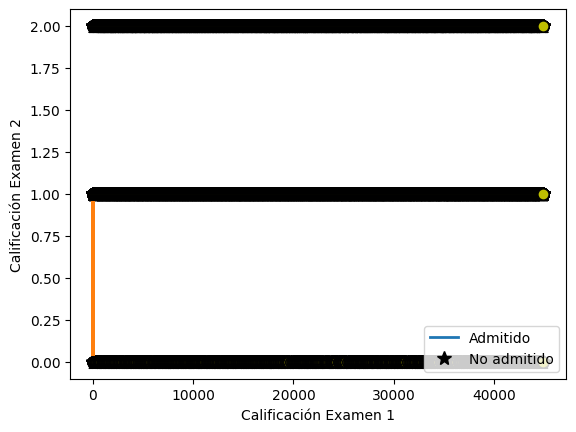

In [183]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Calificación Examen 1')
pyplot.ylabel('Calificación Examen 2')
pyplot.legend(['Admitido', 'No admitido'])
pass

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [184]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X. 

In [185]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[1.00e+00 1.00e+00 0.00e+00 2.60e+01 0.00e+00 2.00e+00 1.18e+03 3.00e+00
 4.00e+00 2.00e+00 1.00e+00 2.00e+00 1.00e+00 1.00e+00 3.00e+00 4.00e+00
 4.00e+00 4.00e+00 4.00e+00 1.00e+00]


La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [186]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [187]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

0.6887529757767006
theta calculado por el descenso por el gradiente: [-5.25252952e-06 -2.82358281e-06 -2.73721458e-06 -1.54436438e-04
  1.64948146e-06 -1.21665398e-05  1.17922380e-04 -4.44119586e-06
 -1.80993297e-05 -8.31436679e-06 -9.60960415e-06  3.46843708e-07
 -6.27658712e-06 -3.94864667e-06 -7.06324456e-06 -7.04152911e-06
 -1.14988989e-05 -9.65121791e-06 -1.16632157e-05 -6.92731428e-06]


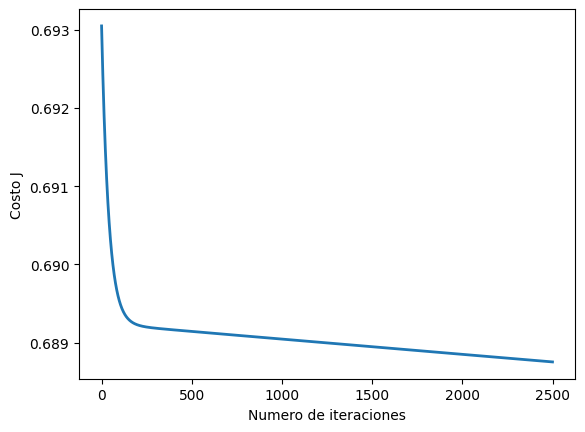

In [188]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0000000212
num_iters = 2500

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(20)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)
print(J_history[-1])
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
#X_array = [1, 20, 40]
#aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto
# alfa 0.00000001
# 0.6890004800564783 1200
#0.6889912634577698 2700
# 0.6888717968867143 4000
#0.6885082443879509  8000
# 0.6889452378804154
#print(f"Un estudiante con nota del examen 1: {X_array[1]} y nota del examen 2: {X_array[2]} (usando el descenso por el gradiente):{aprueba}")

In [189]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [190]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 6.66061741e-02  3.68650694e-02  4.80915883e-02  1.59666583e+00
 -5.69675850e-02  1.89465606e-01 -6.85080941e+01 -5.16439176e-03
  2.42909821e-01  6.47383053e-02  7.51636195e-02 -1.20151746e-01
  9.41174199e-04 -3.93555611e-02  1.94509335e-02  1.90792903e-02
  9.68540649e-02  7.21566886e-02  9.98561693e-02  2.05369037e-02]
Gradiente en theta inicial (zeros):
	[0.0666, 0.0369, 0.0481, 1.5967, -0.0570, 0.1895, -68.5081, -0.0052, 0.2429, 0.0647, 0.0752, -0.1202, 0.0009, -0.0394, 0.0195, 0.0191, 0.0969, 0.0722, 0.0999, 0.0205]


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).


- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [191]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 90000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f} ,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}]'.format(*theta))


C:\Users\User\AppData\Local\Temp\ipykernel_7900\4294695564.py:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


Costo con un valor de theta encontrado por optimize.minimize: 0.340
theta:
	[-9.296, -0.052, -2.027 ,-0.007,3.025,-0.196,0.000,0.349,-0.118,-0.114,-0.014,0.633,0.085,0.043,0.324,0.250,0.145,0.334,0.157,0.209]


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

In [192]:
def plotDecisionBoundary(plotData, theta, X, y):
    """

    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


In [193]:
# Graficar limites
#plotDecisionBoundary(plotData, theta, X, y)

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento. 

In [194]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [218]:
ruta=('./dataset/data03_prueba_satisfacion_servisio_aerolinea.csv')
columnaCategoricas = [i for i in range(0, 25) if not i in [4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]  # poner columnas que no son categoricas
print(columnaCategoricas)
eliminarColumnas=[0,1,11,22,23]#columna a eliminar
data = csvAdapter(ruta, columnaCategoricas,eliminarColumnas)

[0, 1, 2, 3, 5, 6, 11, 22, 23, 24]


In [219]:
data =data.to_numpy()

In [253]:
Xprueba=data[55:56,:19]
Xprueba=np.insert(Xprueba,0,1)
y_r = data[55:56, 19]


Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [254]:
#0 satisfecho
#1 insatisfecho
prob = sigmoid(np.dot(Xprueba, theta))
print('satisfaccion del pasajero de : {:.3f}%'.format(prob))
print('Valor esperado:',y_r)

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))

satisfaccion del pasajero de : 0.002%
Valor esperado: [1]
Precisión de entrenamiento: 87.27 %
